In [2]:
! pip install yfinance pandas requests beautifulsoup4 html5lib matplotlib

# Question 1: Use yfinance to Extract Stock Data

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [6]:
tesla = yf.Ticker("TSLA")

In [8]:
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [61]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url) 
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        data = []
        for row in rows[1:]:  
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                data.append([date, revenue])
        break
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

df.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data

In [75]:
import yfinance as yf
import pandas as pd
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [84]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content in a variable
html_data = response.text

soup = BeautifulSoup(html_data, "html.parser")

# Step 2: Extract revenue table
tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        data = []
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    data.append([date, revenue])
        break

# Step 3: Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

gme_revenue.tail()


,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


# Question 5: Plot Tesla Stock Graph

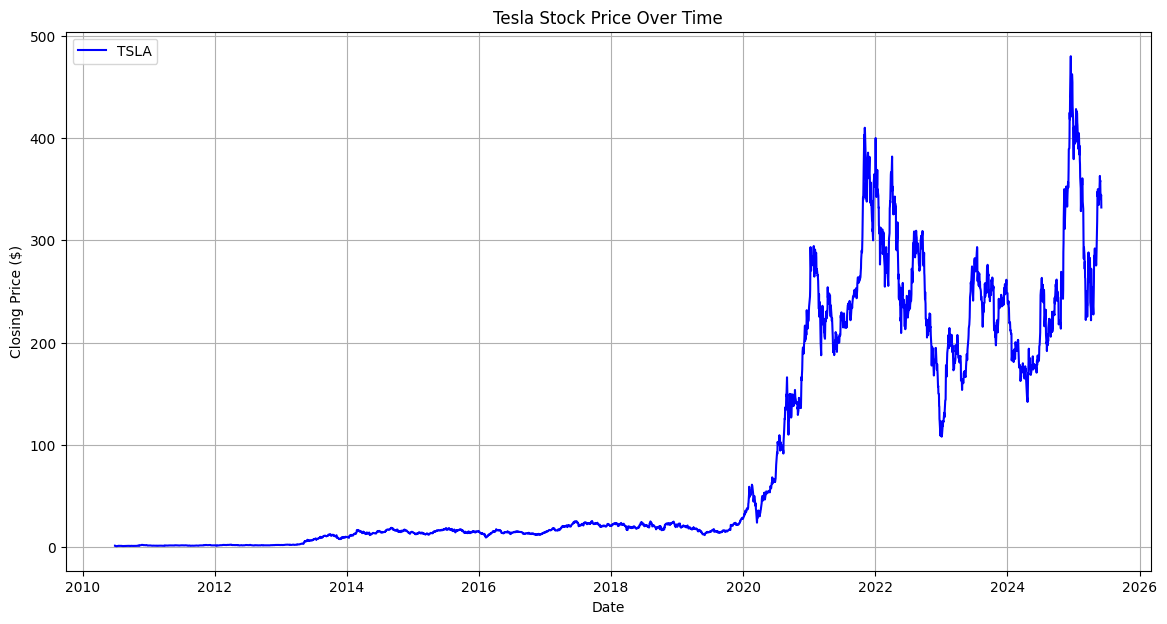

In [92]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, stock, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock, color='blue')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Load Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Plot the graph
make_graph(tesla_data, "TSLA", "Tesla Stock Price Over Time")

# Question 6: Plot GameStop Stock Graph

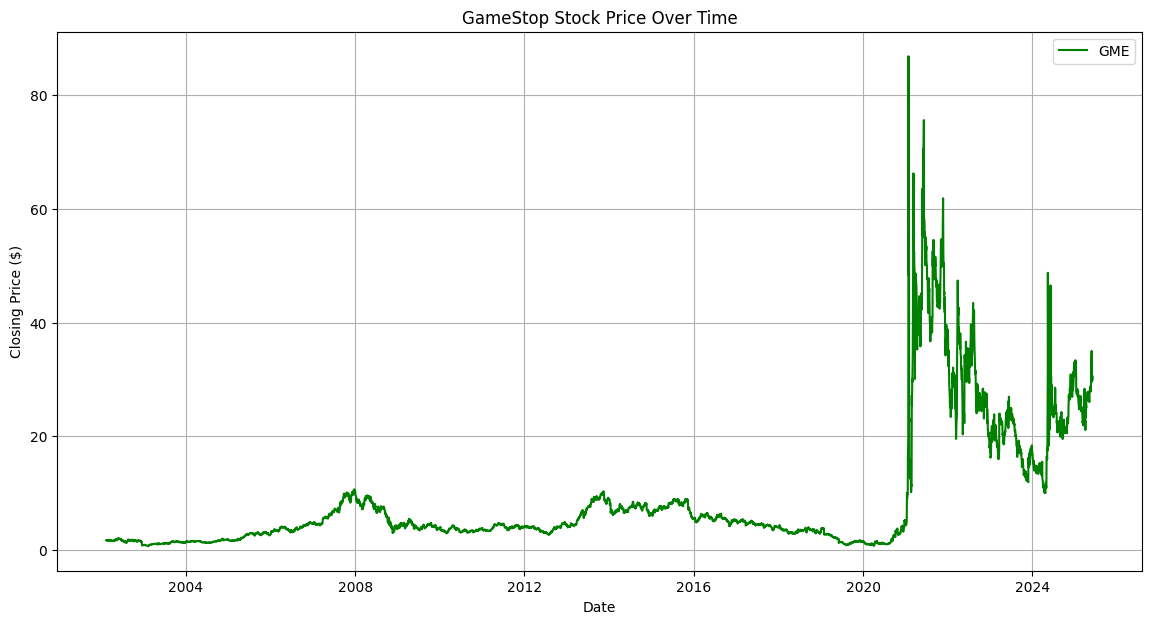

In [97]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function (if not already defined)
def make_graph(stock_data, stock, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock, color='green')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Load GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Plot the graph
make_graph(gme_data, "GME", "GameStop Stock Price Over Time")